# Titanic Prediction using K-nearest neighbor (kNN) classifier

## 1. Defining the Question

### a) Specifying the Question

Predicting the Probability of Survival using the K-Nearest Neighbor Classifier model

### b) Defining the Metric for Success

The model will be considered successful if we can achieve an accuracy of 70% and above

### c) Understanding the context

The Titanic was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg, leading to the deaths of more than 1,500 passengers and crew. In this notebook, we are trying to predict the probability of survival.

### d). Recording the Experimental Design

We will use exploratory data analysis, such as Univariate, and Bivariate Analysis in this study to determine the relationships and differences between different variables. We'll also use K-Nearest Neighbor model to make predictions.

### e) Data Relevance

The dataset to use for this project is the Titanic train and test dataset that can be found from Kaggle website https://www.kaggle.com/c/titanic/data


Below is the dataset glossary:

1. survival - if a person survived, 0 = No, 1 = Yes
2. pclass - the ticket class of a person i.e	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex - the gender of the person		
4. Age - the age of the person	
5. sibsb - number of siblings / spouses aboard the Titanic	
6. parch - number of parents / children aboard the Titanic	
7. ticket - the ticket number	
8. fare - the passenger fare	
9. cabin - the cabin number	
10. embarked - the port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## 2. Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


## 3. Reading the Data

In [74]:
titanic_train = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK9_IP\titanic_train.csv")
titanic_test = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK9_IP\titanic_test.csv")

#### Preview the datasets

In [75]:
# Titanic train

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# Titanic test

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
# Checking the shape for the train dataset

titanic_train.shape

(891, 12)

In [78]:
# Checking the shape for the test dataset

titanic_test.shape

(418, 11)

In [79]:
# Checking the columns of the train dataset

titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
# Checking the columns of the test dataset

titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
# Describing the train dataset

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
# Describing the test dataset

titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4. Cleaning the Dataset

### a). Checking for the Missing Values

In [83]:
# Checking on the Train dataset

total_missing_train = titanic_train.isnull().sum().sort_values(ascending=False)
percentage = (titanic_train.isnull().sum()/titanic_train.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total_missing_train,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [84]:
# Checking on the test dataset

total_missing_test = titanic_test.isnull().sum().sort_values(ascending=False)
percentage = (titanic_test.isnull().sum()/titanic_test.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total_missing_test,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


We can clearly see that the Cabin column has around 78% of missing values on both dataset. This will make of our
analysis to be incosistent if we impute values to the missing values. We shall therefore proceed to delete the
entire column on both datasets.

In [85]:
# Dropping the Cabin column from the train dataset

titanic_train = titanic_train.drop(['Cabin'],axis=1)

In [86]:
# Dropping the Cabin column from the test dataset

titanic_test = titanic_test.drop(['Cabin'],axis=1)

We shall drop the other missing values on other columns without dropping the entire columns on both datasets.

In [87]:
# Dropping Null on the train dataset

titanic_train = titanic_train.dropna()

In [88]:
# Dropping Null on the test dataset

titanic_test = titanic_test.dropna()

In [89]:
# Confirming there are no missing values

print(titanic_train.isnull().sum(),end='\n\n')
print(titanic_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### b). Checking for Duplicates

In [90]:
# Checking duplicates in the train dataset

titanic_train.duplicated().sum()

0

In [91]:
# Checking duplicates in the test dataset

titanic_test.duplicated().sum()

0

There are no duplicate values in both the datasets

### c). Checking the Datatypes

In [92]:
# Checking for the datasets

print(titanic_train.dtypes,end='\n\n')
print(titanic_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


### d). Checking for Outliers

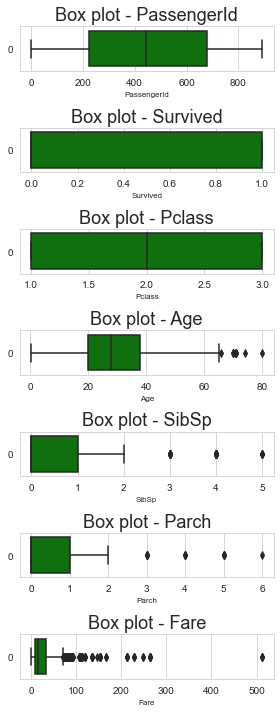

In [93]:
# Checking on the train dataset

# Plotting columns with numerical values only to check for outliers
col_names = titanic_train.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(len(col_names), figsize= (4,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = titanic_train[col_val], ax= ax[i], orient="h", color="green")
  titanic_train[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 18)
  ax[i].set_xlabel(col_val, fontsize= 8)
  
plt.tight_layout()  
plt.show()

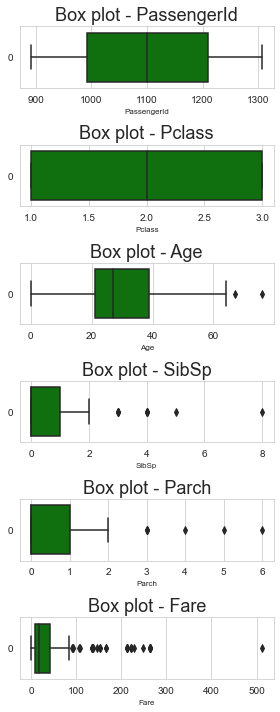

In [94]:
# Checking on the test dataset

# Plotting columns with numerical values only to check for outliers
col_names = titanic_test.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(len(col_names), figsize= (4,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = titanic_test[col_val], ax= ax[i], orient="h", color="green")
  titanic_test[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 18)
  ax[i].set_xlabel(col_val, fontsize= 8)
  
plt.tight_layout()  
plt.show()

In [95]:
# Removing outliers using IQR method on the train dataset
# ---
# Define the outliers range 
Q3 = titanic_train[col_names].quantile(0.75)
Q1 = titanic_train[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = titanic_train[col_names][((titanic_train[col_names] < (Q1 - 1.5 * IQR))
 |(titanic_train[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
i = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(titanic_train))*100

# The total number of outliers
print(f"The total number of outliers are {i}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (148, 6). Which translates to 20.786516853932586% of the data.


In [96]:
# Removing outliers using IQR method on the test dataset
# ---
# Define the outliers range 
Q3 = titanic_test[col_names].quantile(0.75)
Q1 = titanic_test[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = titanic_test[col_names][((titanic_test[col_names] < (Q1 - 1.5 * IQR))
 |(titanic_test[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
i = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(titanic_test))*100

# The total number of outliers
print(f"The total number of outliers are {i}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (47, 6). Which translates to 14.19939577039275% of the data.


## 5. Exploratory Data Analysis (EDA)

### a). Univariate Analysis

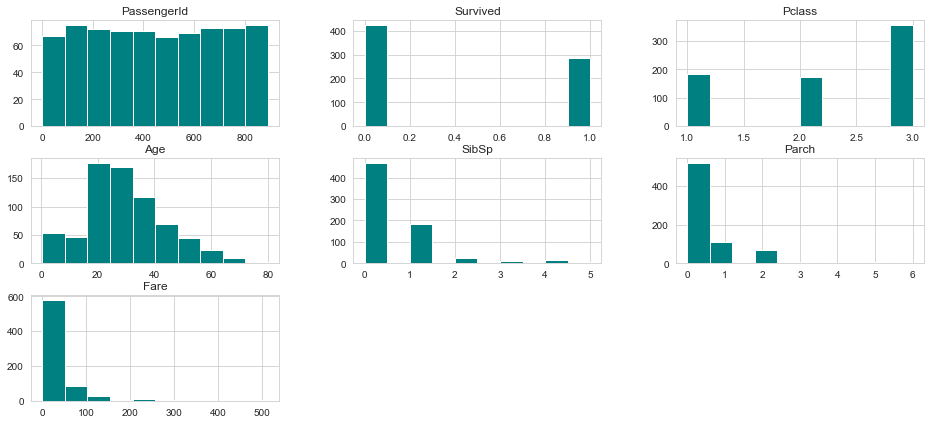

In [97]:
# Plots for data distribution

titanic_train.hist(bins=10, figsize=[16,7], color = 'teal')
plt.show()

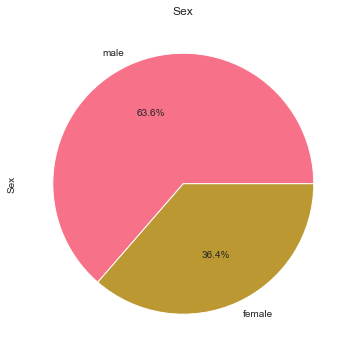

In [98]:
# Piechart for the Sex

colors = sns.color_palette('husl')[0:5]

titanic_train.Sex.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6), colors = colors)
plt.title('Sex')
plt.show()

There is almost close to two thirds of male to female population in our dataset

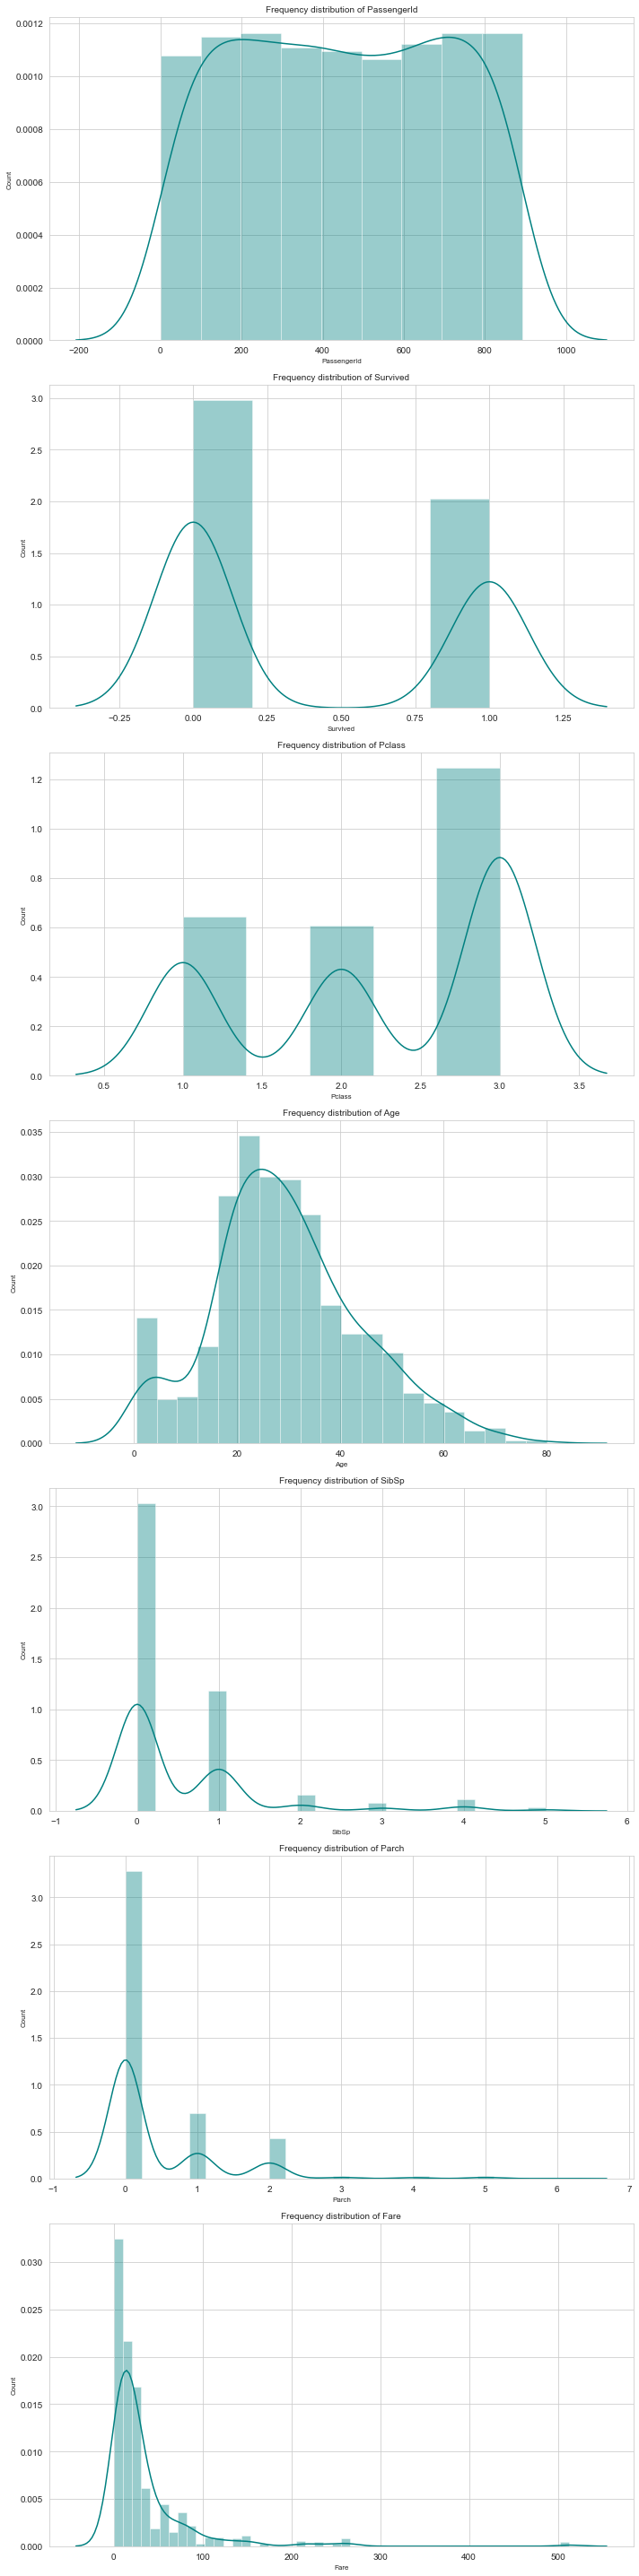

In [99]:
# Plotting distribution of numerical variables

col_names = titanic_train.select_dtypes(include=['number']).columns

fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(titanic_train[col_val], hist=True, ax=ax[i], color='teal')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

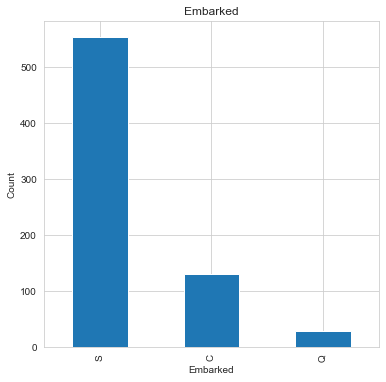

In [100]:
# Barchart for the Embarked

titanic_train.Embarked.value_counts().plot(kind = 'bar', figsize = (6, 6))
plt.title('Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

We can see that most of the people boarded the ship in Southampton

### b). Bivariate Analysis

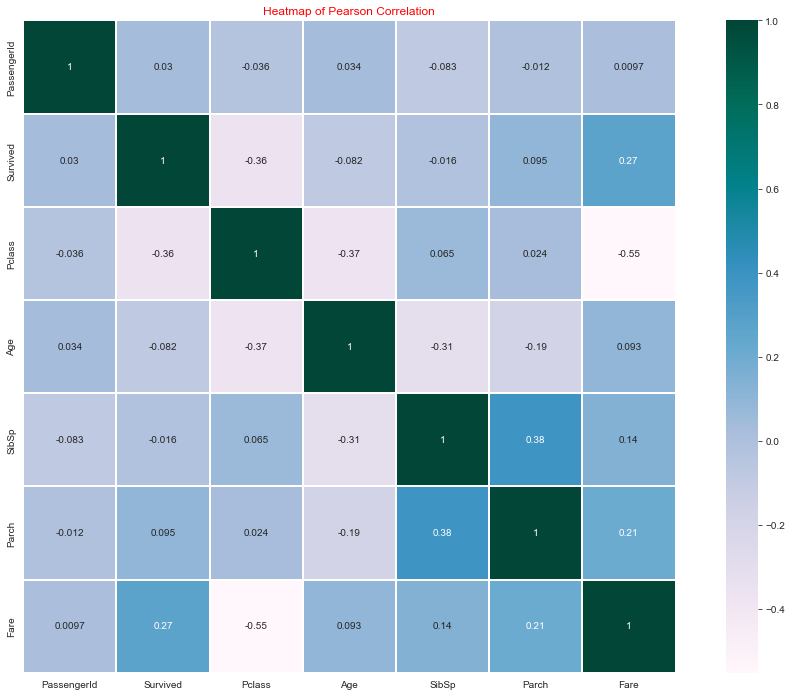

In [101]:
# Checking the Pearson's correlation

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(titanic_train.corr(),annot=True,cmap='PuBuGn',linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot_kws={"size": 10})
plt.title('Heatmap of Pearson Correlation', color='red')
plt.show()

We can see most of our features are weakly correlated to each other

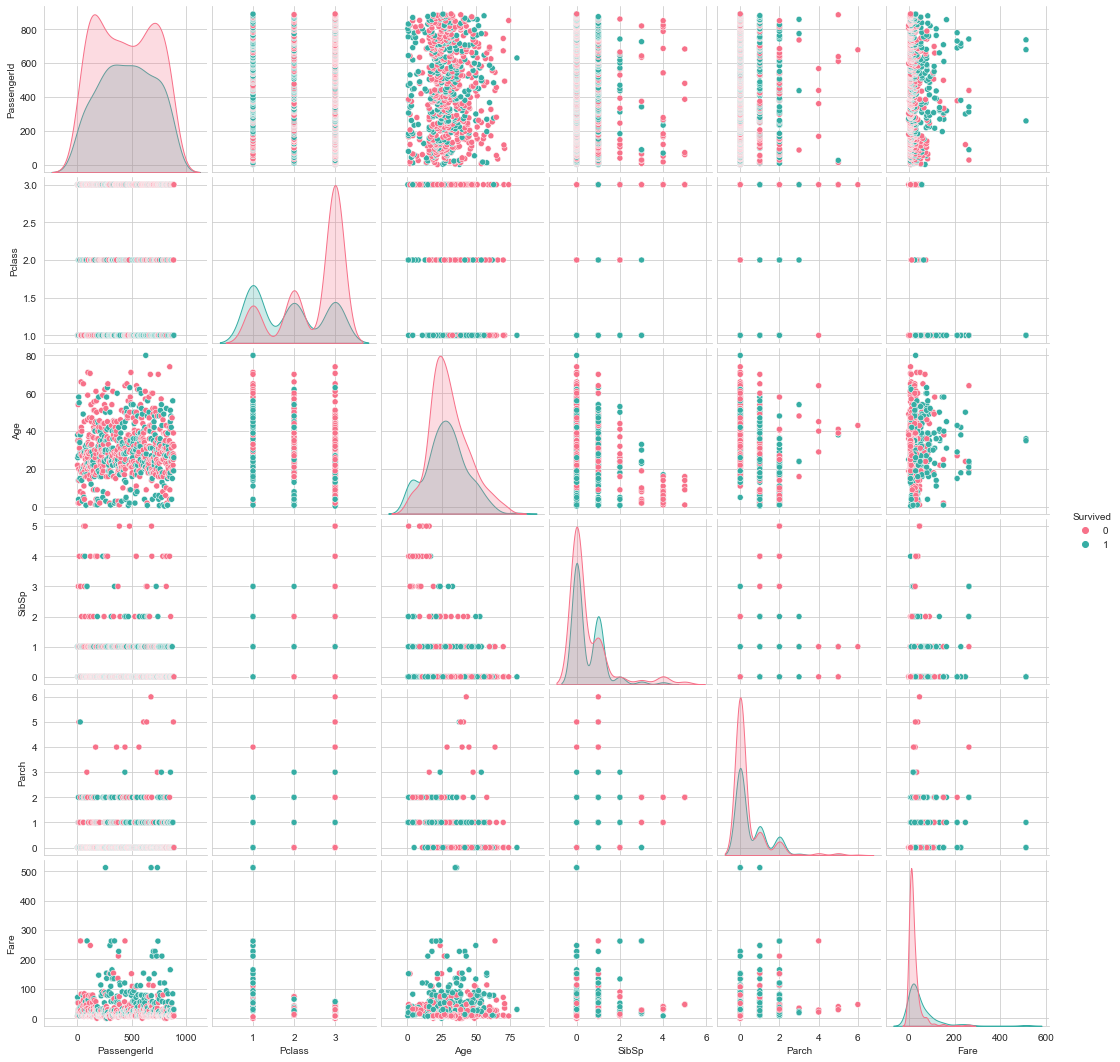

In [102]:
# Ploting the pairplot to show the relationship between the variables

sns.pairplot(titanic_train, hue='Survived', palette='husl')
plt.show()

## 6. Implementing the Solution

We shall be using the K-nearest neighbor (kNN) classifier to predict the survival of the passengers. 
The kNN classifier is a simple algorithm that uses a set of nearest neighbors to make a prediction. Since 
we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), 
randomly partition each dataset into two parts i.e 80 - 20  sets. We shall then report the confusion matrix 
of each classifier and then repeating spliting process using the 70-30, 60-40, then note the outcomes of our modeling.

### i). Splitting the training Set into 80 - 20 sets

In [103]:
# Encoding the categorical variables using LabelEncoder

le = LabelEncoder()

titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])


In [104]:
# Creating our independent and dependent variables while dropping the unnecessary columns

X  = titanic_train.drop(['Survived','Name', 'Ticket','PassengerId','Embarked'], axis=1)
y = titanic_train['Survived']

In [105]:
# Splitting the data into train and test using the test size of 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Scaling the data using StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Modeling the data using K-Nearest Neighbors

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [108]:
# Predicting the test set results

y_pred = classifier.predict(X_test)

# Predicting using KNN
# ---
# 

print("KNN Prediction: %d", y_pred)
print("KNN Prediction (accurate):", y_pred == y_test)

KNN Prediction: %d [1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0]
KNN Prediction (accurate): 641     True
496     True
262     True
311     True
551     True
       ...  
362    False
56      True
137     True
651     True
74     False
Name: Survived, Length: 143, dtype: bool


In [109]:
# Evaluating the model using confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67 13]
 [17 46]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.78      0.73      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.79      0.79      0.79       143



Our model has our an accuracy of 79%

### ii). Splitting the training Set into 70 - 30 sets

In [110]:
# Splitting the data into train and test using the test size of 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # 70% training and 30% test

In [111]:
# Scale the data using StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
#  Modelling the data using K-Nearest Neighbors

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
# Predicting the results

y_pred = classifier.predict(X_test)

# Predicting using KNN
# ---
# 

print("KNN Prediction: %d", y_pred)
print("KNN Prediction (accurate):", y_pred == y_test)

KNN Prediction: %d [1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0]
KNN Prediction (accurate): 641    True
496    True
262    True
311    True
551    True
       ... 
818    True
478    True
325    True
175    True
37     True
Name: Survived, Length: 214, dtype: bool


In [114]:
# Evaluating the model using confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97 25]
 [25 67]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       122
           1       0.73      0.73      0.73        92

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



The model performed even worse with an accuracy of 77%

### iii). Splitting the training Set into 60 - 40 sets

In [115]:
# Splitting the data

# Splitting the data into train and test using the test size of 0.4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=76)   # 60% training and 40% test

In [116]:
# Scaling the data using StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
#  Modelling the data using K-Nearest Neighbors

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
# Predicting the results

y_pred = classifier.predict(X_test)

# Predicting using KNN
# ---
# 

print("KNN Prediction: %d", y_pred)
print("KNN Prediction (accurate):", y_pred == y_test)

KNN Prediction: %d [1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
KNN Prediction (accurate): 218     True
833     True
599    False
519     True
98      True
       ...  
129     True
614     True
315     True
67      True
33      True
Name: Survived, Length: 285, dtype: bool


In [119]:
# Evaluating the model using confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[159  15]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       174
           1       0.84      0.73      0.78       111

    accuracy                           0.84       285
   macro avg       0.84      0.82      0.83       285
weighted avg       0.84      0.84      0.84       285



The model now performs better at 84% accuracy

### Improving the model using Linear Discrimant Analysis (LDA)

**Linear Discriminant Analysis (LDA)** is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs. 

In [120]:
# Spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [121]:
# Scaling the data using Standard Scaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
#  Peforming LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [123]:
# Training the model

#  Modelling the data using K-Nearest Neighbors

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
# Predicting the results

y_pred = classifier.predict(X_test)

# Predicting using KNN
# ---
# 

print("KNN Prediction: %d", y_pred)
print("KNN Prediction (accurate):", y_pred == y_test)

KNN Prediction: %d [0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
KNN Prediction (accurate): 423     True
178     True
305     True
292     True
592     True
       ...  
62      True
215     True
716     True
617    False
136     True
Name: Survived, Length: 285, dtype: bool


In [125]:
# Evaluating the model using confusion matrix and classification report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  29]
 [ 35  81]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       169
           1       0.74      0.70      0.72       116

    accuracy                           0.78       285
   macro avg       0.77      0.76      0.77       285
weighted avg       0.77      0.78      0.77       285



After optimization, the model has now an accuracy of 78% which may imply it is predicting the result well and not overfitting

### Optimization the model using GridSearch CV

In [126]:
k_range=range(1,15)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)

grid_search = GridSearchCV(classifier,param_grid,cv=10,scoring='accuracy')

grid_search.fit(X_train, y_train)

range(1, 15)
{'n_neighbors': range(1, 15)}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, scoring='accuracy')

In [127]:
# Checking the best model

print('GridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8127

Parameters that give the best results : 
 {'n_neighbors': 9}


Estimator that was chosen by the search : 
 KNeighborsClassifier(n_neighbors=9)


We can clearly see the mode performs when the k = 9

In [66]:
# Callculating the GridSearch CV score on the test

print('GridSearch CV score: {0:0.3f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score: 0.793


## 7. Conclusion

We can conclude that our model performs best we split the data into 60% for training and 40% for the test. We also tried to
improve the model using the LDA which reduced the accuracy but also reduced the risk of overfitting the model. We also did
the hyperparameter optimization using the Grid Search whereby we were able to confirm the model performs best when the K value
is 9. 

## 8. Follow up questions

### a) Did we have the right data?

Yes, the dataset available for this analysis was relevant to the research problem.



### b) Do we need other data to answer the research question?

No, the dataset provided had relevant information for the research question.

### c) Did we have the right question?

Yes, the research question was simple and specific enough.